In [1]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
!gdown 1CoTy1ZnYZqsKWUgjM353KVLqJtTLWo-v

Downloading...
From: https://drive.google.com/uc?id=1CoTy1ZnYZqsKWUgjM353KVLqJtTLWo-v
To: /content/nba_stats.csv
100% 3.50M/3.50M [00:00<00:00, 78.8MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('nba_stats.csv')

In [5]:
df.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

In [7]:
df['position'].value_counts()

Center            1530
Power Forward     1422
Shooting Guard    1261
Point Guard       1214
Small Forward     1191
Guard              786
Forward            751
Not Available        6
Guard-Forward        1
Name: position, dtype: int64

In [ ]:
df_filtrado = df[df['position'] != 'Guard-Forward']

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2 # Test set size: 20%
random_state = 42 # Random seed
strat_train_set, strat_test_set = train_test_split(df_filtrado,
                                                   test_size = test_size,
                                                   random_state = random_state,
                                                   stratify = df_filtrado['position'])

In [ ]:
strat_train_set.info()

In [ ]:
strat_test_set.info()

In [8]:
df['salary'].value_counts()

$854,389       110
$3,000,000      81
$4,000,000      78
$5,000,000      76
$1,620,564      54
              ... 
$17,190,000      1
$3,254,880       1
$3,841,920       1
$4,404,629       1
$3,350,760       1
Name: salary, Length: 4345, dtype: int64

In [9]:
df['salary'] = df['salary'].astype(str).str.replace(r'\$|,', '', regex = True).astype(np.int64)

In [13]:
df['salary'].mean()

6156346.203013967

<Axes: >

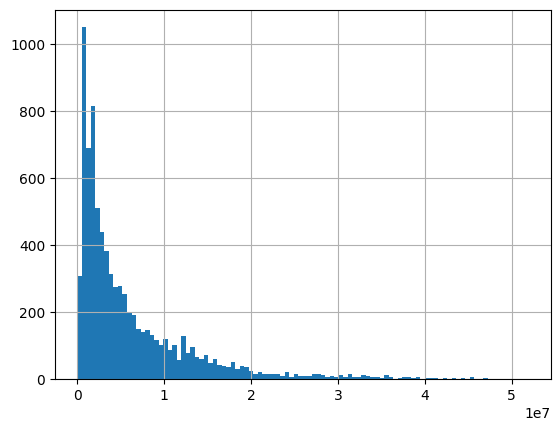

In [17]:
df['salary'].hist(bins = 100)

<Axes: xlabel='positionId'>

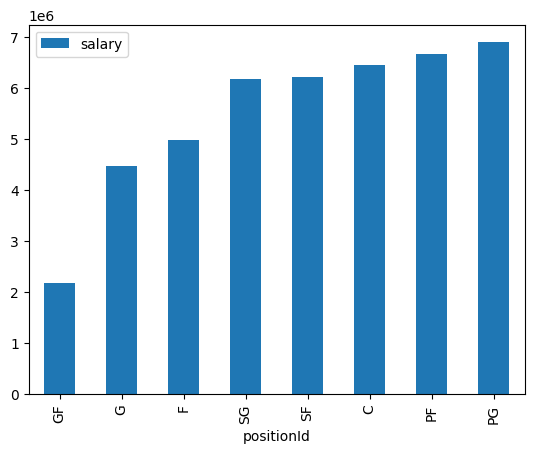

In [19]:
df[['positionId', 'salary']].groupby(['positionId']).mean().sort_values(by = 'salary').plot(kind = 'bar')

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
grupo = df.groupby('positionId')['salary'].agg(['mean', 'median', 'sum', 'count','sem'])
grupo

In [ ]:
df = df[df['positionId'] != 'GF']

In [ ]:
df['positionId'].value_counts().sum()

In [20]:
corr_matrix = df.corr()

<ipython-input-20-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


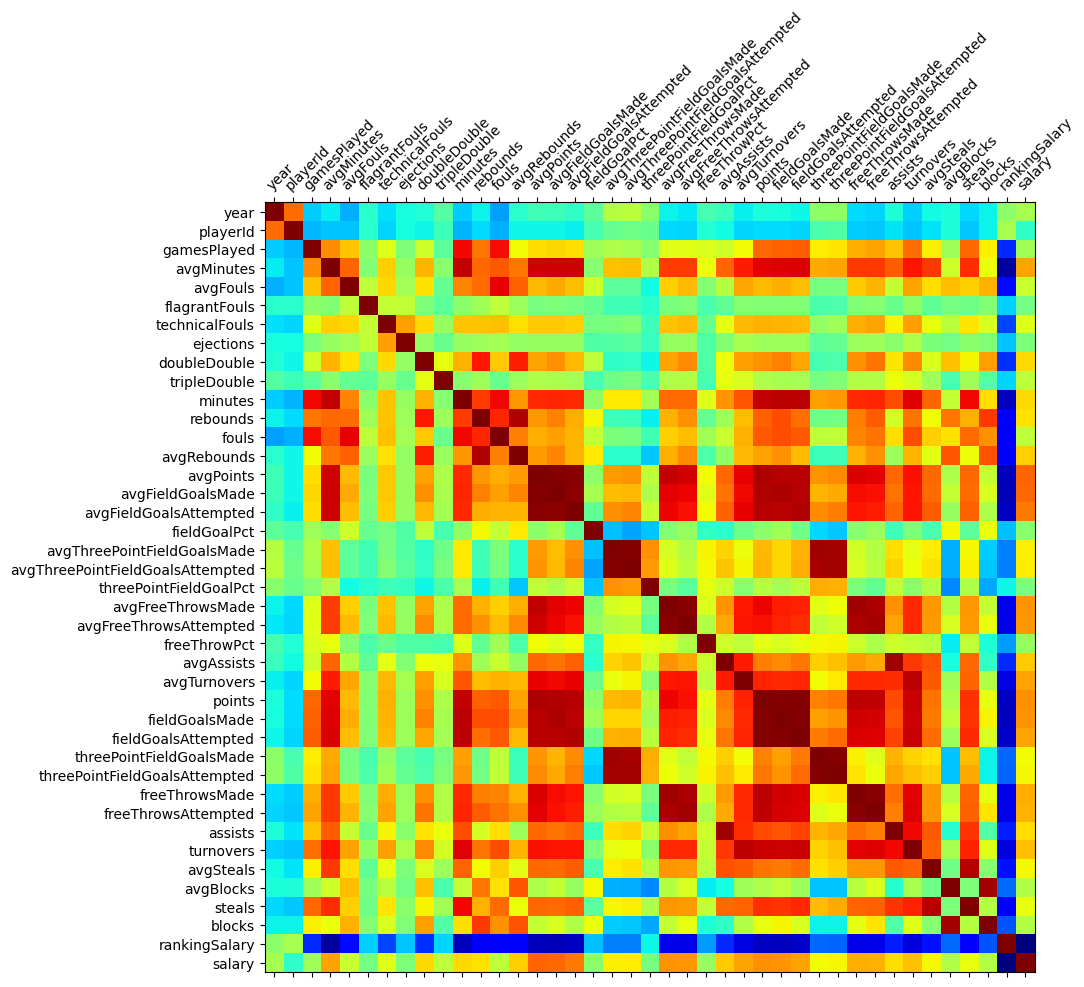

In [21]:
columns = list(corr_matrix.columns)

cm = plt.get_cmap('jet') # viridis,inferno,plasma

fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(corr_matrix,cmap=cm)

# cbar = plt.colorbar()
# cbar.ax.set_ylabel('r')

# ax = plt.gca() # get the current axes
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment
r = plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

In [22]:
corr_matrix['salary'].sort_values(ascending=False)

salary                              1.000000
avgPoints                           0.663278
avgFieldGoalsMade                   0.654786
avgFieldGoalsAttempted              0.623984
points                              0.583561
avgFreeThrowsMade                   0.578352
fieldGoalsMade                      0.574301
avgFreeThrowsAttempted              0.569542
avgTurnovers                        0.547378
fieldGoalsAttempted                 0.546904
avgMinutes                          0.546872
freeThrowsMade                      0.529688
freeThrowsAttempted                 0.521237
turnovers                           0.493262
avgAssists                          0.474230
avgRebounds                         0.470315
doubleDouble                        0.451649
minutes                             0.445531
assists                             0.439636
rebounds                            0.432619
avgThreePointFieldGoalsAttempted    0.414172
avgThreePointFieldGoalsMade         0.408205
threePoint

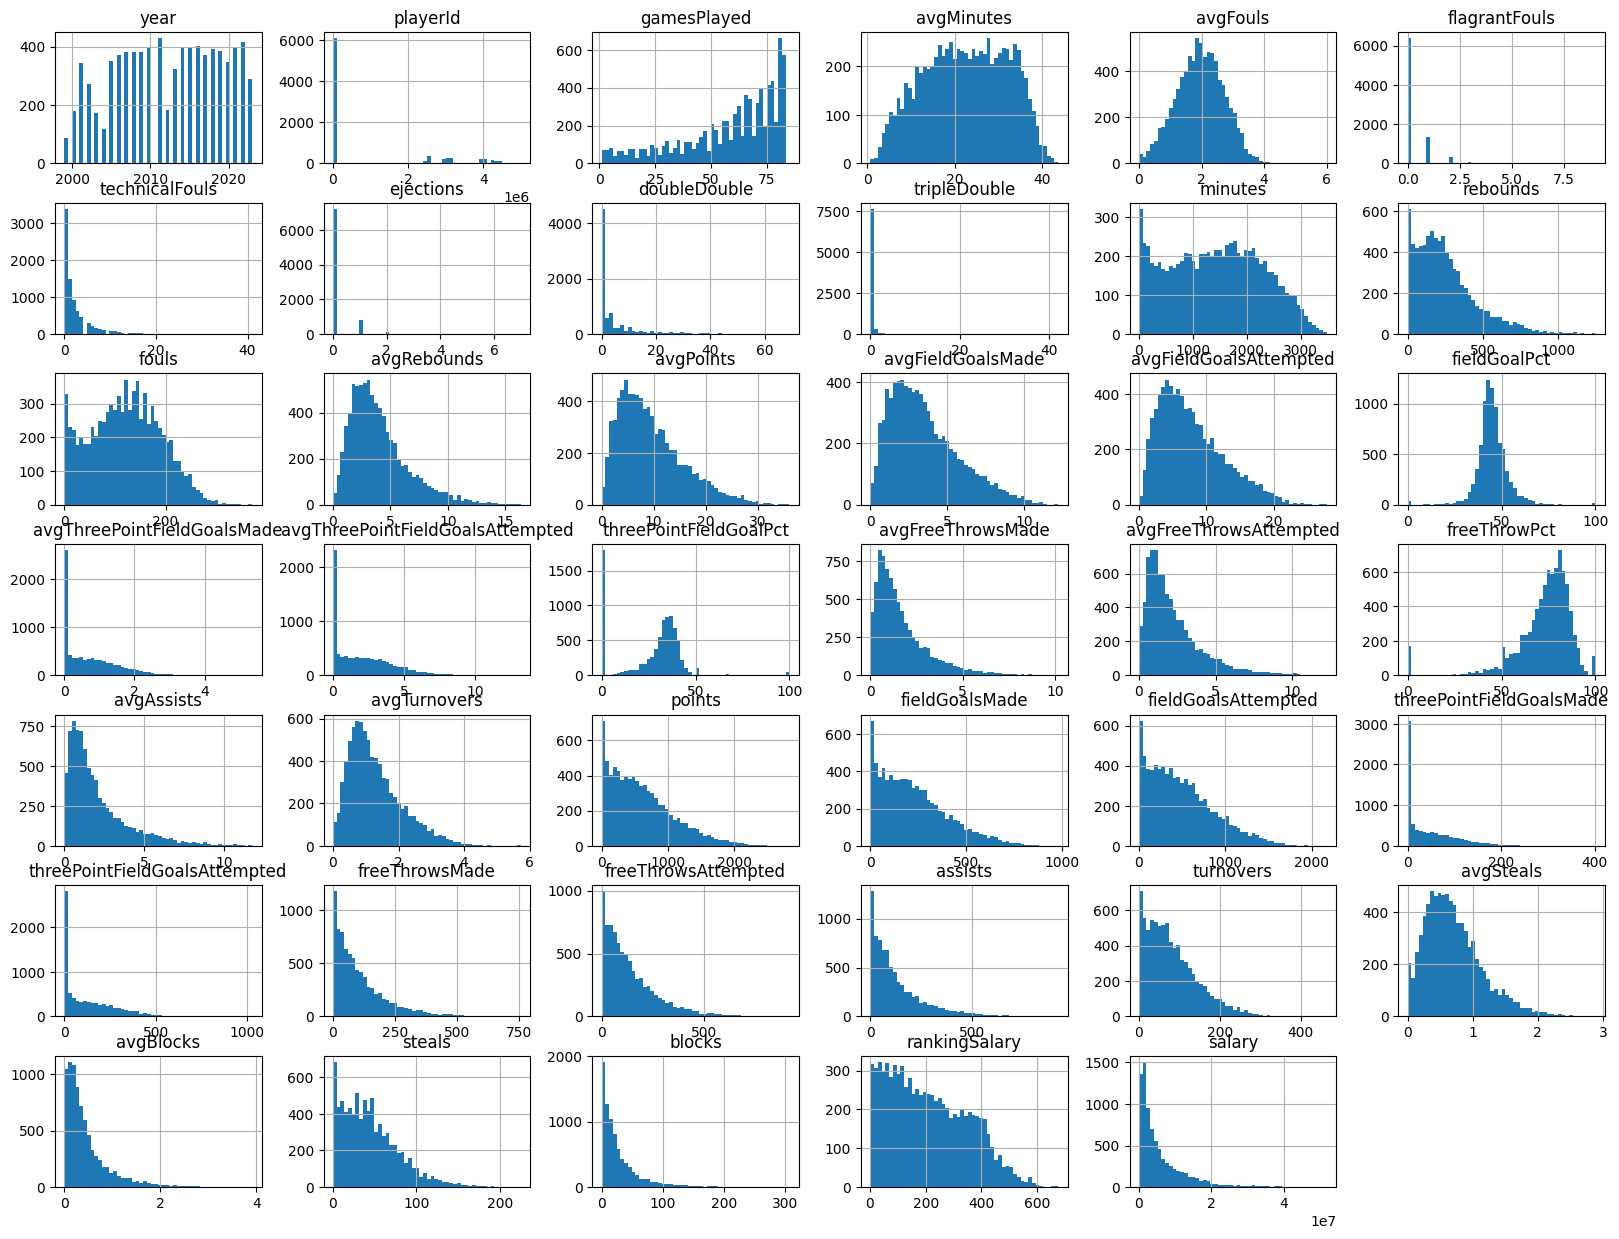

In [23]:
g = df.hist(bins = 50, figsize = (20, 15))

In [ ]:
num_attribs = []